# __CAFE SALES ANALYSIS__
***
__Source:__ https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training?select=dirty_cafe_sales.csv

<div>
<b>Overview</b><br>
The Dirty Cafe Sales dataset contains 10,000 rows of synthetic data representing sales transactions in a cafe. This dataset is intentionally "dirty," with missing values, inconsistent data, and errors introduced to provide a realistic scenario for data cleaning and exploratory data analysis (EDA). It can be used to practice cleaning techniques, data wrangling, and feature engineering.
</div>

<b>File Information</b><br>
File Name: dirty_cafe_sales.csv <br>
Number of Rows: 10,000 <br>
Number of Columns: 8
***

In [2]:
## Importing libraries
import os
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

## Optional
# import numpy as np

***

In [3]:
## Importing .csv 
cafe = pd.read_csv("dirty_cafe_sales.csv")
df_cafe = pd.DataFrame(cafe)
print(df_cafe.to_string())

     Transaction ID      Item Quantity Price Per Unit Total Spent  Payment Method  Location Transaction Date
0       TXN_1961373    Coffee        2            2.0         4.0     Credit Card  Takeaway       2023-09-08
1       TXN_4977031      Cake        4            3.0        12.0            Cash  In-store       2023-05-16
2       TXN_4271903    Cookie        4            1.0       ERROR     Credit Card  In-store       2023-07-19
3       TXN_7034554     Salad        2            5.0        10.0         UNKNOWN   UNKNOWN       2023-04-27
4       TXN_3160411    Coffee        2            2.0         4.0  Digital Wallet  In-store       2023-06-11
5       TXN_2602893  Smoothie        5            4.0        20.0     Credit Card       NaN       2023-03-31
6       TXN_4433211   UNKNOWN        3            3.0         9.0           ERROR  Takeaway       2023-10-06
7       TXN_6699534  Sandwich        4            4.0        16.0            Cash   UNKNOWN       2023-10-28
8       TXN_4717867

In [4]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


***

### 01 _ Data overview and cleaning steps.

#### 01# _ Colums labels overview.

In [5]:
# df_cafe["Price Per Unit"] = df_cafe["Price Per Unit"].astype('float')
# df_cafe.info()

In [6]:
## Columns labels.
col_list = []
for col in df_cafe.columns[:]:
    col_list.append(col)

for el in col_list:
    print(el)

Transaction ID
Item
Quantity
Price Per Unit
Total Spent
Payment Method
Location
Transaction Date


***

#### 01.a _ _"Item"_ & _"Quantity"_ labels value check.

In [7]:
## ITEMS LIST.
df_cafe["Item"].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [8]:
## PRICE CHECK PER ITEM.
# item_name = input("Type the item name here:     ")

# item_column = df_cafe[(df_cafe["Item"] == item_name) & (df_cafe["Quantity"] == "1")] 
# item_column

## RESULTS:
##    - PRICES TABLE -   ##
# Coffee        price   2.0
# Cake          price   3.0
# Cookie        price   1.0
# Salad         price   5.0
# Smoothie      price   4.0
# Sandwich      price   4.0
# Juice         price   3.0
# Tea           price   1.5

***

In [9]:
## ITEMS LIST
df_cafe["Item"].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [10]:
## UNIQUE VALUES FOR "Quantity" 
df_cafe["Quantity"].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [11]:
## UNIQUE VALUES FOR "Total Spent" 
df_cafe["Total Spent"].unique()

array(['4.0', '12.0', 'ERROR', '10.0', '20.0', '9.0', '16.0', '15.0',
       '25.0', '8.0', '5.0', '3.0', '6.0', nan, 'UNKNOWN', '2.0', '1.0',
       '7.5', '4.5', '1.5'], dtype=object)

***

#### 01.b _ _"Item"_ / _"Price Per Unit"_ / _"Quantity"_ / _"Total Spent"_ labels cleaning with data type casting.

In [12]:
## DATA CLEANING 

## Setting correct "Item" prices values  //  df.loc[row, column]
df_cafe.loc[df_cafe["Item"] == "Coffee", "Price Per Unit"] = 2.0
df_cafe.loc[df_cafe["Item"] == "Cake", "Price Per Unit"] = 3.0
df_cafe.loc[df_cafe["Item"] == "Cookie", "Price Per Unit"] = 1.0
df_cafe.loc[df_cafe["Item"] == "Salad", "Price Per Unit"] = 5.0
df_cafe.loc[df_cafe["Item"] == "Smoothie", "Price Per Unit"] = 4.0
df_cafe.loc[df_cafe["Item"] == "Sandwich", "Price Per Unit"] = 4.0
df_cafe.loc[df_cafe["Item"] == "Juice", "Price Per Unit"] = 3.0
df_cafe.loc[df_cafe["Item"] == "Tea", "Price Per Unit"] = 1.5


## Setting correct "Quantity" values  //  df.loc[row, column]
## IF Quantity == "ERROR", "UNKNOWN", "nan" THEN Quantity = 0
df_cafe.loc[df_cafe["Quantity"] == "ERROR", "Quantity"] = 1.0
df_cafe.loc[df_cafe["Quantity"] == "UNKNOWN", "Quantity"] = 1.0
df_cafe.loc[df_cafe["Quantity"] == "nan", "Quantity"] = 1.0
df_cafe.loc[df_cafe["Quantity"].isna(), "Quantity"] = 1.0
df_cafe.loc[df_cafe["Quantity"] == 0.0, "Quantity"] = 1.0


## "Price Per Unit" cleaning.
df_cafe.loc[df_cafe["Price Per Unit"] == "ERROR", "Price Per Unit"] = 0.0
df_cafe.loc[df_cafe["Price Per Unit"] == "UNKNOWN", "Price Per Unit"] = 0.0
df_cafe.loc[df_cafe["Price Per Unit"].isna(), "Price Per Unit"] = 0.0


## "Total Spent" cleaning.
## Converting to number.
df_cafe.loc[df_cafe["Total Spent"] == "ERROR", "Total Spent"] = float(0.0)
df_cafe.loc[df_cafe["Total Spent"] == "UNKNOWN", "Total Spent"] = float(0.0)
df_cafe.loc[df_cafe["Total Spent"].isna(), "Total Spent"] = float(0.0)


## DATA CASTING.
df_cafe["Quantity"] = df_cafe["Quantity"].astype('float')
df_cafe["Price Per Unit"] = df_cafe["Price Per Unit"].astype('float')
df_cafe["Total Spent"] = df_cafe["Total Spent"].astype('float')


print(df_cafe.to_string())

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  Payment Method  Location Transaction Date
0       TXN_1961373    Coffee       2.0             2.0          4.0     Credit Card  Takeaway       2023-09-08
1       TXN_4977031      Cake       4.0             3.0         12.0            Cash  In-store       2023-05-16
2       TXN_4271903    Cookie       4.0             1.0          0.0     Credit Card  In-store       2023-07-19
3       TXN_7034554     Salad       2.0             5.0         10.0         UNKNOWN   UNKNOWN       2023-04-27
4       TXN_3160411    Coffee       2.0             2.0          4.0  Digital Wallet  In-store       2023-06-11
5       TXN_2602893  Smoothie       5.0             4.0         20.0     Credit Card       NaN       2023-03-31
6       TXN_4433211   UNKNOWN       3.0             3.0          9.0           ERROR  Takeaway       2023-10-06
7       TXN_6699534  Sandwich       4.0             4.0         16.0            Cash   UNKNOWN       202

In [13]:
## Calculate correct "Total Spent" values.
df_cafe.loc[df_cafe["Total Spent"] == 0.0, "Total Spent"] = df_cafe["Quantity"] * df_cafe["Price Per Unit"]

In [14]:
## Finding residual "Total Spent" == 0.0 values.
print(df_cafe[df_cafe["Total Spent"] == 0.0].to_string())

     Transaction ID     Item  Quantity  Price Per Unit  Total Spent Payment Method  Location Transaction Date
1761    TXN_3611851      NaN       4.0             0.0          0.0    Credit Card       NaN       2023-02-09
2289    TXN_7524977  UNKNOWN       4.0             0.0          0.0          ERROR       NaN       2023-12-09
4152    TXN_9646000    ERROR       2.0             0.0          0.0            NaN  In-store       2023-12-14


***

#### 01.c _ Checking residual _"ERROR"_, _"UNKNOWN"_ and _NaN_ values in _"Item"_ column.

In [15]:
df_cafe[df_cafe["Item"] == "ERROR"]

Transaction ID   Item  Quantity  Price Per Unit  Total Spent  \
14      TXN_8915701  ERROR       2.0             1.5          3.0   
69      TXN_8471743  ERROR       5.0             3.0         15.0   
88      TXN_9487821  ERROR       1.0             5.0          5.0   
118     TXN_4633784  ERROR       5.0             0.0         15.0   
211     TXN_6717827  ERROR       3.0             5.0         15.0   
...             ...    ...       ...             ...          ...   
9910    TXN_2338617  ERROR       2.0             3.0          6.0   
9918    TXN_2292088  ERROR       1.0             4.0          4.0   
9951    TXN_4122925  ERROR       4.0             1.0          4.0   
9958    TXN_4125474  ERROR       2.0             5.0         10.0   
9981    TXN_4583012  ERROR       5.0             4.0         20.0   

      Payment Method  Location Transaction Date  
14               NaN  In-store       2023-03-21  
69    Digital Wallet  In-store       2023-04-06  
88    Digital Wallet  Takeaway       2023-05-24  
118              NaN  In-store       2023-02-06  
211   Digital Wallet       NaN       2023-11-15  
...              ...       ...              ...  
9910  Digital Wallet   UNKNOWN       2023-01-12  
9918  Digital Wallet  Takeaway       2023-03-04  
9951             NaN  Takeaway       2023-10-20  
9958     Credit Card  In-store       2023-08-02  
9981  Digital Wallet       NaN       2023-02-27  

[292 rows x 8 columns]

In [16]:
df_cafe[df_cafe["Item"] == "UNKNOWN"]

Transaction ID     Item  Quantity  Price Per Unit  Total Spent  \
6       TXN_4433211  UNKNOWN       3.0             3.0          9.0   
31      TXN_8927252  UNKNOWN       2.0             1.0          2.0   
33      TXN_7710508  UNKNOWN       5.0             1.0          5.0   
36      TXN_6855453  UNKNOWN       4.0             3.0         12.0   
52      TXN_8914892  UNKNOWN       5.0             5.0         25.0   
...             ...      ...       ...             ...          ...   
9764    TXN_1688292  UNKNOWN       3.0             0.0          9.0   
9777    TXN_4385826  UNKNOWN       2.0             1.5          3.0   
9836    TXN_9162296  UNKNOWN       3.0             4.0         12.0   
9946    TXN_8807600  UNKNOWN       1.0             4.0          4.0   
9994    TXN_7851634  UNKNOWN       4.0             4.0         16.0   

      Payment Method  Location Transaction Date  
6              ERROR  Takeaway       2023-10-06  
31       Credit Card     ERROR       2023-11-06  
33              Cash       NaN            ERROR  
36               NaN  In-store       2023-07-17  
52    Digital Wallet       NaN       2023-03-15  
...              ...       ...              ...  
9764     Credit Card  In-store              NaN  
9777     Credit Card  Takeaway       2023-08-02  
9836            Cash  In-store       2023-05-10  
9946            Cash  Takeaway       2023-09-24  
9994             NaN       NaN       2023-01-08  

[344 rows x 8 columns]

In [17]:
df_cafe[df_cafe["Item"].isna()]

Transaction ID Item  Quantity  Price Per Unit  Total Spent  \
8       TXN_4717867  NaN       5.0             3.0         15.0   
30      TXN_1736287  NaN       5.0             2.0         10.0   
61      TXN_8051289  NaN       1.0             3.0          3.0   
72      TXN_6044979  NaN       1.0             1.0          1.0   
89      TXN_4132730  NaN       5.0             1.0          5.0   
...             ...  ...       ...             ...          ...   
9820    TXN_8751702  NaN       5.0             0.0         15.0   
9855    TXN_3740505  NaN       2.0             1.5          3.0   
9876    TXN_3105633  NaN       1.0             2.0          2.0   
9885    TXN_4659954  NaN       3.0             4.0         12.0   
9996    TXN_9659401  NaN       3.0             0.0          3.0   

      Payment Method  Location Transaction Date  
8                NaN  Takeaway       2023-07-28  
30    Digital Wallet       NaN       2023-06-02  
61               NaN  In-store       2023-10-09  
72              Cash  In-store       2023-12-08  
89               NaN  In-store       2023-03-12  
...              ...       ...              ...  
9820            Cash       NaN       2023-02-13  
9855             NaN       NaN       2023-11-21  
9876             NaN  In-store       2023-03-30  
9885     Credit Card  In-store              NaN  
9996  Digital Wallet       NaN       2023-06-02  

[333 rows x 8 columns]

In [18]:
## 
error_idx_list = [el for el in df_cafe.index[df_cafe["Item"] == "ERROR"]]
error_idx_list

[14,
 69,
 88,
 118,
 211,
 216,
 235,
 241,
 249,
 258,
 281,
 283,
 323,
 326,
 366,
 372,
 385,
 402,
 406,
 407,
 434,
 476,
 479,
 493,
 511,
 516,
 537,
 550,
 551,
 552,
 555,
 686,
 750,
 796,
 797,
 805,
 810,
 903,
 918,
 919,
 929,
 967,
 984,
 1024,
 1053,
 1062,
 1063,
 1077,
 1127,
 1156,
 1207,
 1337,
 1339,
 1351,
 1376,
 1377,
 1408,
 1420,
 1430,
 1486,
 1508,
 1513,
 1564,
 1629,
 1658,
 1722,
 1769,
 1786,
 1792,
 1803,
 1834,
 1854,
 1890,
 1902,
 1926,
 1943,
 1962,
 2112,
 2136,
 2148,
 2174,
 2198,
 2227,
 2254,
 2268,
 2270,
 2280,
 2287,
 2327,
 2516,
 2519,
 2557,
 2566,
 2578,
 2599,
 2656,
 2711,
 2802,
 2821,
 2842,
 2859,
 2947,
 2957,
 2968,
 2972,
 2978,
 3043,
 3079,
 3146,
 3149,
 3167,
 3175,
 3191,
 3210,
 3240,
 3262,
 3367,
 3435,
 3444,
 3445,
 3448,
 3520,
 3575,
 3586,
 3587,
 3637,
 3659,
 3705,
 3717,
 3805,
 3808,
 3821,
 3833,
 3848,
 3901,
 3921,
 3988,
 4014,
 4058,
 4069,
 4077,
 4085,
 4093,
 4112,
 4116,
 4129,
 4151,
 4152,
 4215,
 42

In [19]:
##
unknown_idx_list = [el for el in df_cafe.index[df_cafe["Item"] == "UNKNOWN"]]
unknown_idx_list

[6,
 31,
 33,
 36,
 52,
 63,
 91,
 153,
 165,
 184,
 227,
 288,
 370,
 386,
 589,
 593,
 602,
 627,
 679,
 688,
 717,
 724,
 727,
 746,
 767,
 799,
 821,
 863,
 881,
 944,
 987,
 1045,
 1055,
 1074,
 1087,
 1142,
 1154,
 1159,
 1167,
 1228,
 1241,
 1254,
 1311,
 1329,
 1345,
 1375,
 1385,
 1432,
 1481,
 1529,
 1551,
 1559,
 1638,
 1692,
 1703,
 1719,
 1738,
 1746,
 1843,
 1889,
 1927,
 1956,
 1959,
 1978,
 2016,
 2043,
 2109,
 2139,
 2156,
 2185,
 2187,
 2207,
 2222,
 2239,
 2281,
 2289,
 2302,
 2326,
 2380,
 2587,
 2617,
 2624,
 2629,
 2674,
 2731,
 2787,
 2885,
 2907,
 2956,
 2962,
 2969,
 3010,
 3012,
 3013,
 3017,
 3115,
 3138,
 3187,
 3200,
 3289,
 3305,
 3322,
 3344,
 3354,
 3374,
 3430,
 3434,
 3446,
 3450,
 3459,
 3463,
 3468,
 3498,
 3508,
 3546,
 3554,
 3559,
 3582,
 3583,
 3595,
 3600,
 3634,
 3649,
 3656,
 3658,
 3662,
 3666,
 3697,
 3710,
 3711,
 3730,
 3739,
 3757,
 3761,
 3764,
 3779,
 3818,
 3831,
 3832,
 3847,
 3917,
 3945,
 3974,
 3981,
 4092,
 4100,
 4114,
 4115,
 42

In [20]:
##
nan_idx_list = [el for el in df_cafe.index[df_cafe["Item"].isna()]]
nan_idx_list

[8,
 30,
 61,
 72,
 89,
 100,
 151,
 168,
 197,
 203,
 247,
 269,
 289,
 311,
 334,
 356,
 362,
 369,
 388,
 442,
 482,
 523,
 535,
 605,
 647,
 663,
 699,
 759,
 769,
 771,
 806,
 815,
 818,
 877,
 880,
 901,
 947,
 972,
 975,
 990,
 991,
 1019,
 1028,
 1099,
 1149,
 1186,
 1198,
 1213,
 1229,
 1238,
 1282,
 1296,
 1316,
 1364,
 1384,
 1386,
 1401,
 1434,
 1451,
 1522,
 1571,
 1574,
 1589,
 1614,
 1615,
 1641,
 1678,
 1725,
 1733,
 1753,
 1761,
 1790,
 1796,
 1808,
 1913,
 1919,
 2002,
 2015,
 2107,
 2150,
 2159,
 2218,
 2226,
 2328,
 2371,
 2382,
 2383,
 2388,
 2391,
 2415,
 2433,
 2462,
 2483,
 2487,
 2563,
 2583,
 2596,
 2610,
 2712,
 2817,
 2904,
 2914,
 2916,
 2934,
 2976,
 3059,
 3067,
 3172,
 3227,
 3236,
 3239,
 3243,
 3373,
 3375,
 3378,
 3396,
 3404,
 3427,
 3479,
 3487,
 3518,
 3526,
 3545,
 3609,
 3643,
 3677,
 3679,
 3690,
 3759,
 3774,
 3796,
 3817,
 3824,
 3877,
 3878,
 3900,
 3913,
 3964,
 3991,
 4003,
 4018,
 4075,
 4086,
 4119,
 4211,
 4233,
 4255,
 4269,
 4279,
 430

In [21]:
# df_cafe_final = df_cafe

In [22]:
## DROPPINg Rows with Item == "ERROR"
for el in error_idx_list:
    df_cafe = df_cafe.drop(index=el)

df_cafe

Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee       2.0             2.0          4.0   
1       TXN_4977031      Cake       4.0             3.0         12.0   
2       TXN_4271903    Cookie       4.0             1.0          4.0   
3       TXN_7034554     Salad       2.0             5.0         10.0   
4       TXN_3160411    Coffee       2.0             2.0          4.0   
...             ...       ...       ...             ...          ...   
9995    TXN_7672686    Coffee       2.0             2.0          4.0   
9996    TXN_9659401       NaN       3.0             0.0          3.0   
9997    TXN_5255387    Coffee       4.0             2.0          8.0   
9998    TXN_7695629    Cookie       3.0             1.0          3.0   
9999    TXN_6170729  Sandwich       3.0             4.0         12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store       2023-05-16  
2        Credit Card  In-store       2023-07-19  
3            UNKNOWN   UNKNOWN       2023-04-27  
4     Digital Wallet  In-store       2023-06-11  
...              ...       ...              ...  
9995             NaN   UNKNOWN       2023-08-30  
9996  Digital Wallet       NaN       2023-06-02  
9997  Digital Wallet       NaN       2023-03-02  
9998  Digital Wallet       NaN       2023-12-02  
9999            Cash  In-store       2023-11-07  

[9708 rows x 8 columns]

In [23]:
## DROPPINg Rows with Item == "UNKNOWN"
for el in unknown_idx_list:
    df_cafe = df_cafe.drop(index=el)

df_cafe

Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee       2.0             2.0          4.0   
1       TXN_4977031      Cake       4.0             3.0         12.0   
2       TXN_4271903    Cookie       4.0             1.0          4.0   
3       TXN_7034554     Salad       2.0             5.0         10.0   
4       TXN_3160411    Coffee       2.0             2.0          4.0   
...             ...       ...       ...             ...          ...   
9995    TXN_7672686    Coffee       2.0             2.0          4.0   
9996    TXN_9659401       NaN       3.0             0.0          3.0   
9997    TXN_5255387    Coffee       4.0             2.0          8.0   
9998    TXN_7695629    Cookie       3.0             1.0          3.0   
9999    TXN_6170729  Sandwich       3.0             4.0         12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store       2023-05-16  
2        Credit Card  In-store       2023-07-19  
3            UNKNOWN   UNKNOWN       2023-04-27  
4     Digital Wallet  In-store       2023-06-11  
...              ...       ...              ...  
9995             NaN   UNKNOWN       2023-08-30  
9996  Digital Wallet       NaN       2023-06-02  
9997  Digital Wallet       NaN       2023-03-02  
9998  Digital Wallet       NaN       2023-12-02  
9999            Cash  In-store       2023-11-07  

[9364 rows x 8 columns]

In [24]:
## DROPPINg Rows with Item == NaN
for el in nan_idx_list:
    df_cafe = df_cafe.drop(index=el)

df_cafe

Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee       2.0             2.0          4.0   
1       TXN_4977031      Cake       4.0             3.0         12.0   
2       TXN_4271903    Cookie       4.0             1.0          4.0   
3       TXN_7034554     Salad       2.0             5.0         10.0   
4       TXN_3160411    Coffee       2.0             2.0          4.0   
...             ...       ...       ...             ...          ...   
9993    TXN_4766549  Smoothie       2.0             4.0          8.0   
9995    TXN_7672686    Coffee       2.0             2.0          4.0   
9997    TXN_5255387    Coffee       4.0             2.0          8.0   
9998    TXN_7695629    Cookie       3.0             1.0          3.0   
9999    TXN_6170729  Sandwich       3.0             4.0         12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store       2023-05-16  
2        Credit Card  In-store       2023-07-19  
3            UNKNOWN   UNKNOWN       2023-04-27  
4     Digital Wallet  In-store       2023-06-11  
...              ...       ...              ...  
9993            Cash       NaN       2023-10-20  
9995             NaN   UNKNOWN       2023-08-30  
9997  Digital Wallet       NaN       2023-03-02  
9998  Digital Wallet       NaN       2023-12-02  
9999            Cash  In-store       2023-11-07  

[9031 rows x 8 columns]

In [25]:
## FIELDS CALCULATIONS

## "Quantity"
df_cafe.loc[df_cafe["Quantity"] == 1.0, "Quantity"] = df_cafe["Total Spent"] / df_cafe["Price Per Unit"]

## "Total Spent"
df_cafe.loc[df_cafe["Total Spent"] == 0.0, "Total Spent"] = df_cafe["Price Per Unit"] * df_cafe["Quantity"]

## "Price Per Unit"
df_cafe.loc[df_cafe["Price Per Unit"] == 0.0, "Price Per Unit"] = df_cafe["Total Spent"] / df_cafe["Quantity"]


print(df_cafe.to_string())

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  Payment Method  Location Transaction Date
0       TXN_1961373    Coffee       2.0             2.0          4.0     Credit Card  Takeaway       2023-09-08
1       TXN_4977031      Cake       4.0             3.0         12.0            Cash  In-store       2023-05-16
2       TXN_4271903    Cookie       4.0             1.0          4.0     Credit Card  In-store       2023-07-19
3       TXN_7034554     Salad       2.0             5.0         10.0         UNKNOWN   UNKNOWN       2023-04-27
4       TXN_3160411    Coffee       2.0             2.0          4.0  Digital Wallet  In-store       2023-06-11
5       TXN_2602893  Smoothie       5.0             4.0         20.0     Credit Card       NaN       2023-03-31
7       TXN_6699534  Sandwich       4.0             4.0         16.0            Cash   UNKNOWN       2023-10-28
9       TXN_2064365  Sandwich       5.0             4.0         20.0             NaN  In-store       202

#### 01.d _ _"Quantity"_, _"Total Spent"_, _"Price Per Unit"_ ratio calculation.

In [26]:
##      PRICES TABLE      ##
# Coffee        price   2.0
# Cake          price   3.0
# Cookie        price   1.0
# Salad         price   5.0
# Smoothie      price   4.0
# Sandwich      price   4.0
# Juice         price   3.0
# Tea           price   1.5

In [27]:
df_cafe[df_cafe["Total Spent"] == 0.0]

Empty DataFrame
Columns: [Transaction ID, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date]
Index: []

***

#### 01.e _ Filling _"Item"_ values (__PART 01)__.

In [28]:
## ITEM FIELD COMPLETION

df_cafe.loc[df_cafe["Price Per Unit"] == 1.0, "Item"] = "Cookie"
df_cafe.loc[df_cafe["Price Per Unit"] == 1.5, "Item"] = "Tea"
df_cafe.loc[df_cafe["Price Per Unit"] == 2.0, "Item"] = "Cookie"
# df_cafe.loc[df_cafe["Price Per Unit"] == 3.0, "Item"] = "Cake"            ## Change after
# df_cafe.loc[df_cafe["Price Per Unit"] == 3.0, "Item"] = "Juice"           ## Change after
# df_cafe.loc[df_cafe["Price Per Unit"] == 4.0, "Item"] = "Sandwich"        ## Change after
# df_cafe.loc[df_cafe["Price Per Unit"] == 4.0, "Item"] = "Smoothies"       ## Change after
df_cafe.loc[df_cafe["Price Per Unit"] == 5.0, "Item"] = "Salad"

print(df_cafe.to_string())

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  Payment Method  Location Transaction Date
0       TXN_1961373    Cookie       2.0             2.0          4.0     Credit Card  Takeaway       2023-09-08
1       TXN_4977031      Cake       4.0             3.0         12.0            Cash  In-store       2023-05-16
2       TXN_4271903    Cookie       4.0             1.0          4.0     Credit Card  In-store       2023-07-19
3       TXN_7034554     Salad       2.0             5.0         10.0         UNKNOWN   UNKNOWN       2023-04-27
4       TXN_3160411    Cookie       2.0             2.0          4.0  Digital Wallet  In-store       2023-06-11
5       TXN_2602893  Smoothie       5.0             4.0         20.0     Credit Card       NaN       2023-03-31
7       TXN_6699534  Sandwich       4.0             4.0         16.0            Cash   UNKNOWN       2023-10-28
9       TXN_2064365  Sandwich       5.0             4.0         20.0             NaN  In-store       202

In [29]:
## CHECK FOR DATAFRAME INFO AFTER DATA TYPE CONVERSION
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9031 non-null   object 
 1   Item              9031 non-null   object 
 2   Quantity          9031 non-null   float64
 3   Price Per Unit    9031 non-null   float64
 4   Total Spent       9031 non-null   float64
 5   Payment Method    6701 non-null   object 
 6   Location          6086 non-null   object 
 7   Transaction Date  8888 non-null   object 
dtypes: float64(3), object(5)
memory usage: 893.0+ KB


***

#### 01.f _ Filling _"Item"_ values (__PART 02)__.

In [30]:
print(f'Unknown count: {len(df_cafe[df_cafe["Item"] == "UNKNOWN"])} items')

Unknown count: 0 items


In [31]:
print(f'Error count: {len(df_cafe[df_cafe["Item"] == "ERROR"])} items')

Error count: 0 items


In [32]:
print(f'NaN count: {len(df_cafe[df_cafe["Item"].isna()])} items')

NaN count: 0 items


In [33]:
## FIND index FOR Item == "ERROR"
item_series = pd.Series(df_cafe["Item"])

item_idx_list = [el for el in item_series.index[item_series == "ERROR"]]
# item_idx_list

In [34]:
for el in item_idx_list:
    if el % 2 == 0:
        df_cafe.loc[df_cafe["Price Per Unit"] == 3.0, "Item"] = "Cake"
    if el % 2 != 0:
        df_cafe.loc[df_cafe["Price Per Unit"] == 3.0, "Item"] = "Juice"

print(df_cafe.to_string())

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  Payment Method  Location Transaction Date
0       TXN_1961373    Cookie       2.0             2.0          4.0     Credit Card  Takeaway       2023-09-08
1       TXN_4977031      Cake       4.0             3.0         12.0            Cash  In-store       2023-05-16
2       TXN_4271903    Cookie       4.0             1.0          4.0     Credit Card  In-store       2023-07-19
3       TXN_7034554     Salad       2.0             5.0         10.0         UNKNOWN   UNKNOWN       2023-04-27
4       TXN_3160411    Cookie       2.0             2.0          4.0  Digital Wallet  In-store       2023-06-11
5       TXN_2602893  Smoothie       5.0             4.0         20.0     Credit Card       NaN       2023-03-31
7       TXN_6699534  Sandwich       4.0             4.0         16.0            Cash   UNKNOWN       2023-10-28
9       TXN_2064365  Sandwich       5.0             4.0         20.0             NaN  In-store       202

In [35]:
## FIND index FOR Item == "UNKNOWN"
item_idx_unknownlist = [el for el in item_series.index[item_series == "UNKNOWN"]]
item_idx_unknownlist

[]

In [36]:
for el in item_idx_unknownlist:
    if el % 2 == 0:
        df_cafe.loc[df_cafe["Price Per Unit"] == 4.0, "Item"] = "Sandwich"
    if el % 2 != 0:
        df_cafe.loc[df_cafe["Price Per Unit"] == 4.0, "Item"] = "Smoothies"

# df_cafe


***

#### 01.g _ _"Transaction Date"_ label cleaning.

In [37]:
len(df_cafe[df_cafe["Transaction Date"] == "UNKNOWN"])

145

In [38]:
## Finding MODE tendency for column 
df_cafe["Transaction Date"].mode()

0    UNKNOWN
Name: Transaction Date, dtype: object

In [39]:
print(df_cafe.sort_values("Transaction Date").to_string())

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  Payment Method  Location Transaction Date
768     TXN_5728991     Salad       2.0             5.0         10.0             NaN       NaN       2023-01-01
8885    TXN_1581562    Cookie       2.0             2.0          4.0            Cash  In-store       2023-01-01
6583    TXN_3093284    Cookie       4.0             2.0          8.0  Digital Wallet  In-store       2023-01-01
1912    TXN_5563675       Tea       3.0             1.5          4.5  Digital Wallet  In-store       2023-01-01
2244    TXN_5358805    Cookie       5.0             2.0         10.0  Digital Wallet     ERROR       2023-01-01
840     TXN_8249251      Cake       3.0             3.0          9.0           ERROR  In-store       2023-01-01
9356    TXN_2104473      Cake       3.0             3.0          9.0  Digital Wallet  Takeaway       2023-01-01
7152    TXN_6566716    Cookie       1.0             2.0          2.0     Credit Card       NaN       202

In [40]:
## Transaction Date == ERROR
print(f'"Transaction Date" Error count: { len(df_cafe[df_cafe["Transaction Date"] == "ERROR"]) }')

"Transaction Date" Error count: 130


In [41]:
## Transaction Date == UNKNOWN
print(f'"Transaction Date" Unknown count: { len(df_cafe[df_cafe["Transaction Date"] == "UNKNOWN"]) }')

"Transaction Date" Unknown count: 145


In [42]:
## Transaction Date == NaN
print(f'"Transaction Date" NaN count: { len(df_cafe[df_cafe["Transaction Date"].isna()]) }')

"Transaction Date" NaN count: 143


In [43]:
## Creating a list with dates in "Transaction Date"
dates_list = []

## Removing "ERROR", "UNKNOWN", NaN values from list
for date in df_cafe["Transaction Date"].dropna():
    if date != "ERROR" and date != "UNKNOWN":
        dates_list.append(date)


dates_list

['2023-09-08',
 '2023-05-16',
 '2023-07-19',
 '2023-04-27',
 '2023-06-11',
 '2023-03-31',
 '2023-10-28',
 '2023-12-31',
 '2023-11-07',
 '2023-05-03',
 '2023-06-01',
 '2023-11-15',
 '2023-06-10',
 '2023-02-24',
 '2023-03-25',
 '2023-01-15',
 '2023-04-04',
 '2023-03-30',
 '2023-12-01',
 '2023-09-18',
 '2023-06-03',
 '2023-12-13',
 '2023-04-20',
 '2023-04-10',
 '2023-03-11',
 '2023-08-15',
 '2023-10-09',
 '2023-05-28',
 '2023-04-29',
 '2023-06-08',
 '2023-06-29',
 '2023-04-17',
 '2023-12-22',
 '2023-01-10',
 '2023-10-02',
 '2023-02-23',
 '2023-03-22',
 '2023-11-03',
 '2023-03-02',
 '2023-06-26',
 '2023-05-02',
 '2023-09-05',
 '2023-01-08',
 '2023-11-25',
 '2023-12-05',
 '2023-03-19',
 '2023-06-27',
 '2023-04-19',
 '2023-11-03',
 '2023-10-07',
 '2023-09-30',
 '2023-05-27',
 '2023-06-01',
 '2023-10-20',
 '2023-03-30',
 '2023-10-03',
 '2023-10-27',
 '2023-03-22',
 '2023-01-31',
 '2023-06-19',
 '2023-12-14',
 '2023-07-16',
 '2023-02-22',
 '2023-06-02',
 '2023-06-15',
 '2023-12-09',
 '2023-04-

In [44]:
## Example for random picking values

test_list = []

i = 0
while i <=9:
    rand_date_value = random.choice(dates_list)
    test_list.append(rand_date_value)
    i += 1

# test_list

In [45]:
## 

df_cafe.loc[df_cafe["Transaction Date"] == "ERROR", "Transaction Date"] = random.choice(dates_list)
df_cafe.loc[df_cafe["Transaction Date"] == "UNKNOWN", "Transaction Date"] = random.choice(dates_list)
df_cafe.loc[df_cafe["Transaction Date"].isna(), "Transaction Date"] = random.choice(dates_list)

In [46]:
df_cafe["Transaction Date"].unique()

array(['2023-09-08', '2023-05-16', '2023-07-19', '2023-04-27',
       '2023-06-11', '2023-03-31', '2023-10-28', '2023-12-31',
       '2023-11-07', '2023-04-01', '2023-05-03', '2023-06-01',
       '2023-11-15', '2023-06-10', '2023-02-24', '2023-03-25',
       '2023-01-15', '2023-04-04', '2023-03-30', '2023-12-01',
       '2023-09-18', '2023-06-03', '2023-12-13', '2023-04-20',
       '2023-04-10', '2023-03-11', '2023-08-15', '2023-10-09',
       '2023-05-28', '2023-04-29', '2023-06-08', '2023-06-29',
       '2023-04-17', '2023-12-22', '2023-01-10', '2023-10-02',
       '2023-02-23', '2023-03-22', '2023-11-03', '2023-03-02',
       '2023-06-26', '2023-05-02', '2023-09-05', '2023-01-08',
       '2023-11-25', '2023-12-05', '2023-03-19', '2023-06-27',
       '2023-04-19', '2023-10-07', '2023-09-30', '2023-05-27',
       '2023-10-20', '2023-10-03', '2023-10-27', '2023-01-31',
       '2023-06-19', '2023-12-14', '2023-07-16', '2023-02-22',
       '2023-11-17', '2023-06-02', '2023-06-15', '2023-

In [47]:
df_cafe["Transaction Date"] = pd.to_datetime(df_cafe["Transaction Date"])

df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9031 non-null   object        
 1   Item              9031 non-null   object        
 2   Quantity          9031 non-null   float64       
 3   Price Per Unit    9031 non-null   float64       
 4   Total Spent       9031 non-null   float64       
 5   Payment Method    6701 non-null   object        
 6   Location          6086 non-null   object        
 7   Transaction Date  9031 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 893.0+ KB


***

#### 01.h _ _"Payment Method"_ cleaning.

In [48]:
df_cafe["Payment Method"].mode()

0    Digital Wallet
Name: Payment Method, dtype: object

In [49]:
df_cafe["Payment Method"].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', nan, 'ERROR'],
      dtype=object)

In [50]:
## Payment Method cleaning
df_cafe.loc[df_cafe["Payment Method"] == "ERROR", "Payment Method"] = "Credit Card"
df_cafe.loc[df_cafe["Payment Method"] == "UNKNOWN", "Payment Method"] = "Digitl Wallet"
df_cafe.loc[df_cafe["Payment Method"].isna(), "Payment Method"] = "Cash"

In [51]:
df_cafe["Payment Method"].unique()

array(['Credit Card', 'Cash', 'Digitl Wallet', 'Digital Wallet'],
      dtype=object)

In [52]:
df_cafe

Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Cookie       2.0             2.0          4.0   
1       TXN_4977031      Cake       4.0             3.0         12.0   
2       TXN_4271903    Cookie       4.0             1.0          4.0   
3       TXN_7034554     Salad       2.0             5.0         10.0   
4       TXN_3160411    Cookie       2.0             2.0          4.0   
...             ...       ...       ...             ...          ...   
9993    TXN_4766549  Smoothie       2.0             4.0          8.0   
9995    TXN_7672686    Cookie       2.0             2.0          4.0   
9997    TXN_5255387    Cookie       4.0             2.0          8.0   
9998    TXN_7695629    Cookie       3.0             1.0          3.0   
9999    TXN_6170729  Sandwich       3.0             4.0         12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store       2023-05-16  
2        Credit Card  In-store       2023-07-19  
3      Digitl Wallet   UNKNOWN       2023-04-27  
4     Digital Wallet  In-store       2023-06-11  
...              ...       ...              ...  
9993            Cash       NaN       2023-10-20  
9995            Cash   UNKNOWN       2023-08-30  
9997  Digital Wallet       NaN       2023-03-02  
9998  Digital Wallet       NaN       2023-12-02  
9999            Cash  In-store       2023-11-07  

[9031 rows x 8 columns]

***

#### 01.i _ _"Location"_ label cleaning.

In [53]:
df_cafe["Location"].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

In [54]:
df_cafe["Location"].mode()

0    Takeaway
Name: Location, dtype: object

In [55]:
## Location Date == ERROR
print(f'"Location" Error count: { len(df_cafe[df_cafe["Location"] == "ERROR"]) }')

"Location" Error count: 326


In [56]:
## Location Date == UNKNOWN
print(f'"Location" Unknown count: { len(df_cafe[df_cafe["Location"] == "UNKNOWN"]) }')

"Location" Unknown count: 312


In [57]:
## Location Date == NaN
print(f'"Location" NaN count: { len(df_cafe[df_cafe["Location"].isna()]) }')

"Location" NaN count: 2945


In [58]:
## Location cleaning
df_cafe.loc[df_cafe["Location"] == "ERROR", "Location"] = "In-store"
df_cafe.loc[df_cafe["Location"] == "UNKNOWN", "Location"] = "In-store"
df_cafe.loc[df_cafe["Location"].isna(), "Location"] = "Takeaway"

In [59]:
df_cafe["Location"].unique()

array(['Takeaway', 'In-store'], dtype=object)

In [60]:
df_cafe

Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Cookie       2.0             2.0          4.0   
1       TXN_4977031      Cake       4.0             3.0         12.0   
2       TXN_4271903    Cookie       4.0             1.0          4.0   
3       TXN_7034554     Salad       2.0             5.0         10.0   
4       TXN_3160411    Cookie       2.0             2.0          4.0   
...             ...       ...       ...             ...          ...   
9993    TXN_4766549  Smoothie       2.0             4.0          8.0   
9995    TXN_7672686    Cookie       2.0             2.0          4.0   
9997    TXN_5255387    Cookie       4.0             2.0          8.0   
9998    TXN_7695629    Cookie       3.0             1.0          3.0   
9999    TXN_6170729  Sandwich       3.0             4.0         12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store       2023-05-16  
2        Credit Card  In-store       2023-07-19  
3      Digitl Wallet  In-store       2023-04-27  
4     Digital Wallet  In-store       2023-06-11  
...              ...       ...              ...  
9993            Cash  Takeaway       2023-10-20  
9995            Cash  In-store       2023-08-30  
9997  Digital Wallet  Takeaway       2023-03-02  
9998  Digital Wallet  Takeaway       2023-12-02  
9999            Cash  In-store       2023-11-07  

[9031 rows x 8 columns]

***

#### 01.j _ Creating new column _"Day_of_the_week"_.

In [61]:
###
df_cafe["Day_of_the_week"] = df_cafe["Transaction Date"].dt.day_name()
df_cafe


Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Cookie       2.0             2.0          4.0   
1       TXN_4977031      Cake       4.0             3.0         12.0   
2       TXN_4271903    Cookie       4.0             1.0          4.0   
3       TXN_7034554     Salad       2.0             5.0         10.0   
4       TXN_3160411    Cookie       2.0             2.0          4.0   
...             ...       ...       ...             ...          ...   
9993    TXN_4766549  Smoothie       2.0             4.0          8.0   
9995    TXN_7672686    Cookie       2.0             2.0          4.0   
9997    TXN_5255387    Cookie       4.0             2.0          8.0   
9998    TXN_7695629    Cookie       3.0             1.0          3.0   
9999    TXN_6170729  Sandwich       3.0             4.0         12.0   

      Payment Method  Location Transaction Date Day_of_the_week  
0        Credit Card  Takeaway       2023-09-08          Friday  
1               Cash  In-store       2023-05-16         Tuesday  
2        Credit Card  In-store       2023-07-19       Wednesday  
3      Digitl Wallet  In-store       2023-04-27        Thursday  
4     Digital Wallet  In-store       2023-06-11          Sunday  
...              ...       ...              ...             ...  
9993            Cash  Takeaway       2023-10-20          Friday  
9995            Cash  In-store       2023-08-30       Wednesday  
9997  Digital Wallet  Takeaway       2023-03-02        Thursday  
9998  Digital Wallet  Takeaway       2023-12-02        Saturday  
9999            Cash  In-store       2023-11-07         Tuesday  

[9031 rows x 9 columns]

In [62]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9031 non-null   object        
 1   Item              9031 non-null   object        
 2   Quantity          9031 non-null   float64       
 3   Price Per Unit    9031 non-null   float64       
 4   Total Spent       9031 non-null   float64       
 5   Payment Method    9031 non-null   object        
 6   Location          9031 non-null   object        
 7   Transaction Date  9031 non-null   datetime64[ns]
 8   Day_of_the_week   9031 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 963.6+ KB


***

#### 01.k _ Labels final check for 0.0 values.

In [69]:
## Decomment for check.
# df_cafe[df_cafe["Quantity"] == 0.0]
# df_cafe[df_cafe["Price Per Unit"] == 0.0]
# df_cafe[df_cafe["Total Spent"] == 0.0]

***

### 02 _ Data visualization.

#### 02.a _ Boxplot printing: ___Total Spent per Item___.

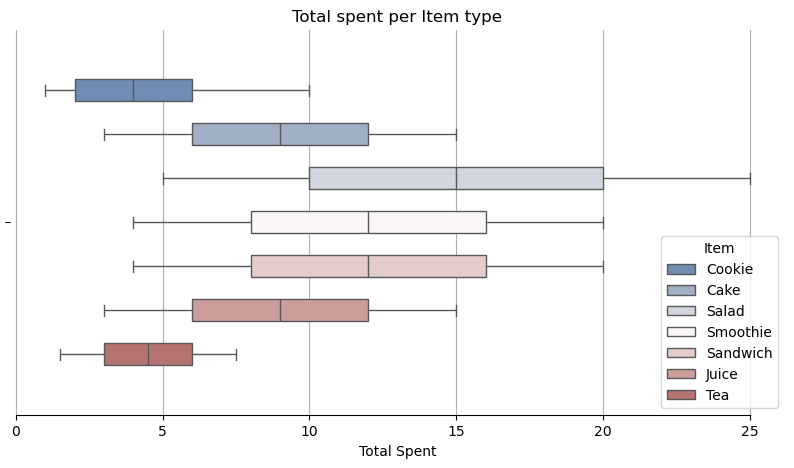

In [1311]:
## Boxplot printing

f, ax = plt.subplots(figsize=(10, 5))
# ax.set_xscale("log")

sns.boxplot(df_cafe, x="Total Spent", hue="Item", gap=.5, width=.8, palette="vlag")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(title="Total spent per Item type")
sns.despine(trim=True, left=True)

***

#### 02.b _ Scatterplot printing.

In [1312]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9031 non-null   object        
 1   Item              9031 non-null   object        
 2   Quantity          9031 non-null   float64       
 3   Price Per Unit    9031 non-null   float64       
 4   Total Spent       9031 non-null   float64       
 5   Payment Method    9031 non-null   object        
 6   Location          9031 non-null   object        
 7   Transaction Date  9031 non-null   datetime64[ns]
 8   Day_of_the_week   9031 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 963.6+ KB


<Axes: >

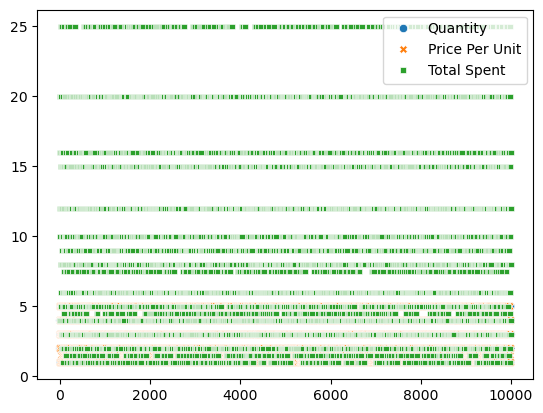

***

#### 02.b _ Barplot printing: ___2023 Items total revenue___.

In [111]:
rev_per_item = df_cafe.groupby("Item")["Total Spent"].sum()
rev_per_item

Item
Cake        10407.0
Cookie      10316.0
Juice       10524.0
Salad       17355.0
Sandwich    13732.0
Smoothie    13352.0
Tea          4962.0
Name: Total Spent, dtype: float64

C:\Users\danie\AppData\Local\Temp\ipykernel_352\1622122905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_per_item, palette="rocket", ax=ax)


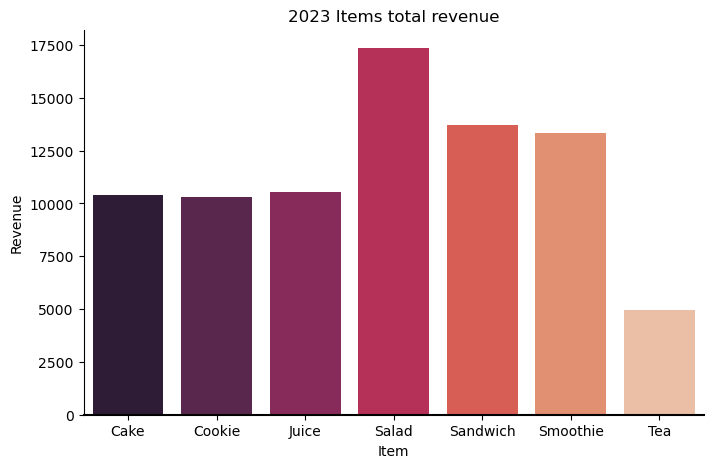

In [112]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5), sharex=True)

sns.barplot(data=rev_per_item, palette="rocket", ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("Revenue")
ax.set_title("2023 Items total revenue")

sns.despine(bottom=True)

***

In [113]:
rev_per_item = df_cafe.groupby("Item")["Total Spent"].sum().reset_index()
rev_per_item

Item  Total Spent
0      Cake      10407.0
1    Cookie      10316.0
2     Juice      10524.0
3     Salad      17355.0
4  Sandwich      13732.0
5  Smoothie      13352.0
6       Tea       4962.0

<Axes: xlabel='Total Spent', ylabel='Price Per Unit'>

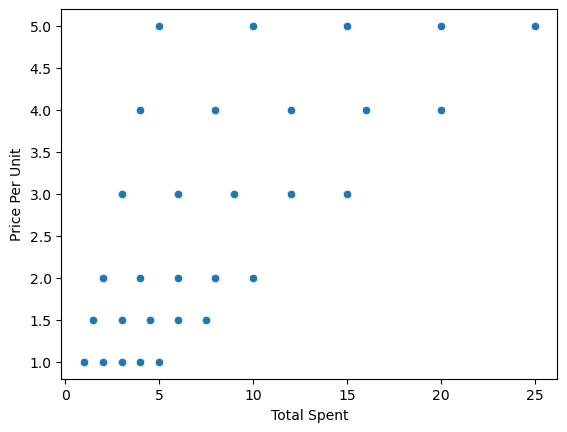

In [128]:
# sns.scatterplot(rev_per_item, x="Item", y="Total Spent", hue="Total Spent", palette="rocket", size="Total Spent")
sns.scatterplot(df_cafe, x="Total Spent", y="Price Per Unit")